### Day 45 – Feature Scaling: Normalization vs. Standardization 

In this notebook, I learned about **Feature Scaling**, a crucial preprocessing step in Machine Learning.  
Feature scaling ensures that all features contribute equally to the model and prevents bias caused by varying scales of data.  

I will cover:  
- Why feature scaling is needed  
- Two main techniques: **Normalization (Min-Max Scaling)** and **Standardization (Z-score Scaling)**  
- A small dataset example with Python implementation  
- When to use which scaling method

---

## 1. What is Feature Scaling?

Feature scaling is the process of adjusting the values of numerical features in a dataset to a standard scale. This is important because many machine learning algorithms, particularly those that use distance-based calculations (like K-Nearest Neighbors, Support Vector Machines, and gradient descent-based algorithms like Linear Regression), can be biased towards features with larger values.

**Why it matters:** If a feature like `salary` (ranging from $50k to $100k) is used alongside `age` (ranging from 20 to 60), the model might incorrectly assume that `salary` is a more important feature just because its values are larger. Feature scaling ensures all features contribute equally to the model.

---


## 2. Normalization (Min-Max Scaling)

**Normalization**, also known as Min-Max Scaling, scales all numerical features to a specific range, typically between 0 and 1. It is a good choice when you know that the data does not follow a Gaussian (normal) distribution.

**How it works:** It transforms the data based on the minimum and maximum values of the feature.

**Formula:**
$$X_{new} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

  * $X$: The original value.
  * $X_{min}$: The minimum value of the feature.
  * $X_{max}$: The maximum value of the feature.

**When to use:** Use normalization when you need to maintain the original distribution's shape and when your algorithm doesn't make assumptions about the data's distribution (e.g., in deep learning). However, it's sensitive to outliers.

---

### Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# Sample Data: I'll create a DataFrame with two features, Age and Salary.
# Age has a smaller range, while Salary has a much larger range.
data = {'Age': [25, 30, 35, 40, 50, 60],
        'Salary': [45000, 55000, 65000, 80000, 120000, 150000]}
df = pd.DataFrame(data)

In [3]:
# Original data
print("--- Original Data ---")
print(df)

--- Original Data ---
   Age  Salary
0   25   45000
1   30   55000
2   35   65000
3   40   80000
4   50  120000
5   60  150000


In [4]:
# --- Normalization Example ---
print("\n--- Normalization (Min-Max Scaling) ---")

# Create a MinMaxScaler object
min_max_scaler = MinMaxScaler()

# Fit and transform the data
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
print(df_normalized)


--- Normalization (Min-Max Scaling) ---
        Age    Salary
0  0.000000  0.000000
1  0.142857  0.095238
2  0.285714  0.190476
3  0.428571  0.333333
4  0.714286  0.714286
5  1.000000  1.000000


---

## 3. Standardization (Z-Score Scaling)

**Standardization**, also known as Z-Score Scaling, transforms the data to have a mean of 0 and a standard deviation of 1. It is a good choice when the data follows a Gaussian (normal) distribution or if your algorithm assumes this distribution.

**How it works:** It subtracts the mean and divides by the standard deviation.

**Formula:**
$$X_{new} = \frac{X - \mu}{\sigma}$$

  * $X$: The original value.
  * $\mu$: The mean of the feature.
  * $\sigma$: The standard deviation of the feature.

**When to use:** Standardization is generally the default choice for many algorithms, especially those that rely on assumptions of a normal distribution. It is also less affected by outliers compared to normalization.

---
### Example:

In [5]:
# --- Standardization Example ---
print("\n--- Standardization (Z-Score Scaling) ---")

# Create a StandardScaler object
standard_scaler = StandardScaler()

# Fit and transform the data
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
print(df_standardized)


--- Standardization (Z-Score Scaling) ---
        Age    Salary
0 -1.260252 -1.093216
1 -0.840168 -0.825490
2 -0.420084 -0.557763
3  0.000000 -0.156174
4  0.840168  0.914732
5  1.680336  1.717911


### Visualization

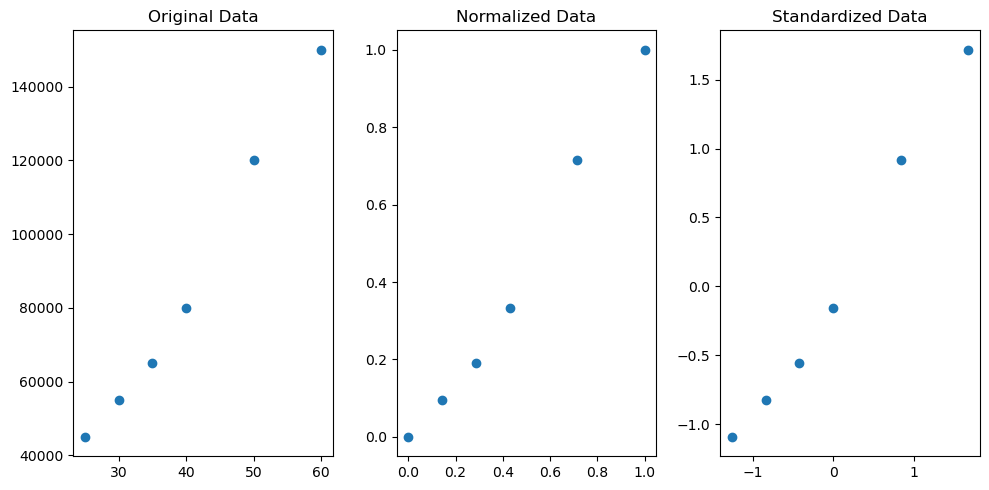

In [6]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.title("Original Data")
plt.scatter(data['Age'], data['Salary'])

plt.subplot(1,3,2)
plt.title("Normalized Data")
plt.scatter(df_normalized['Age'], df_normalized['Salary'])

plt.subplot(1,3,3)
plt.title("Standardized Data")
plt.scatter(df_standardized['Age'], df_standardized['Salary'])

plt.tight_layout()
plt.show()


**Explanation of the Code**

  * I create a sample DataFrame with two features, `Age` and `Salary`, to clearly see the effect of scaling.
  * I use the `MinMaxScaler()` from `scikit-learn` to perform **normalization**. The output shows that all values are now in the range [0, 1].
  * I use the `StandardScaler()` from `scikit-learn` to perform **standardization**. The output shows that the transformed features now have a mean of approximately 0 and a standard deviation of 1.

---

## Normalization vs Standardization

| Aspect              | Normalization (Min-Max)       | Standardization (Z-score)        |
|---------------------|-------------------------------|----------------------------------|
| Range               | [0, 1]                        | Mean = 0, SD = 1 (≈ -3 to +3)   |
| Assumption          | No distribution assumption    | Assumes Gaussian distribution   |
| Outlier Sensitivity | Sensitive to outliers         | Robust to outliers              |
| When to Use         | Algorithms needing bounded input (e.g., Neural Nets, KNN) | Linear Regression, Logistic Regression, SVM |


## 4. Conclusion

Feature scaling is a critical preprocessing step that ensures all features are treated equally by machine learning models. **Normalization** scales data to a fixed range (0-1), while **Standardization** transforms it to have a mean of 0 and a standard deviation of 1. Choosing the right technique depends on your data's distribution and the requirements of your chosen algorithm.

## Key Takeaways
- Feature Scaling ensures all features contribute equally to model training.  
- **Normalization (Min-Max Scaling):** [0,1] range, sensitive to outliers, no distribution assumption.  
- **Standardization (Z-score Scaling):** mean=0, SD=1, robust to outliers, assumes Gaussian distribution.  
- Choice depends on the algorithm and dataset.  

---

## Summary – Day45: Feature Scaling in Machine Learning

* Learned about **Feature Scaling**, an important preprocessing step.
* Two main techniques:

  * **Normalization (Min-Max Scaling):** Scales data to \[0,1], no distribution assumption, but sensitive to outliers.
  * **Standardization (Z-score Scaling):** Transforms data to mean=0, SD=1 (≈ -3 to 3), assumes Gaussian distribution, robust to outliers.
* Scaling ensures all features contribute equally and improves model performance.
